<a href="https://colab.research.google.com/github/ihor-horovyi/projector_course_ml/blob/master/hw2_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3. Exploratory Data Analysis: Pandas
Wikipedia Web Traffic Time Series – https://www.kaggle.com/competitions/web-traffic-time-series-forecasting/data



---



Необхідно провести аналіз датасету та відповісти на наступні питання:

Dataset preparing

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv("/content/drive/MyDrive/projector_course_data/Web_Traffic_Forecasting/train_1.csv")


# 1. Вікіпедії на яких мовах доступні в цьому датасеті?



In [4]:
pattern = r'_([a-z]+)\.wikipedia\.org'

In [5]:
# create new feature
train['country_code'] = train['Page'].str.extract(pattern)

train.groupby('country_code').size()

country_code
de    18547
en    24108
es    14069
fr    17802
ja    20431
ru    15022
zh    17229
dtype: int64

# 2. Скільки сторінок французькою є на Вікіпедії у датасеті?

In [6]:
train[train['country_code'] == 'fr'].shape[0]

17802

# 3. Вивести топ-3 статті для кожної мови за квітень 2016 року.

In [7]:
april_2016_columns = ['Page'] + [col for col in train.columns if '2016-04' in col]

april_2016_train = train[april_2016_columns].copy()

april_2016_train['total_views'] = april_2016_train.iloc[:, 1:].sum(axis=1)


april_page_views = april_2016_train[['Page', 'total_views']].copy()


april_page_views['country_code'] = april_page_views['Page'].str.extract(pattern)


def get_top3_pages(group):
    return group.nlargest(3, 'total_views')

top3_pages_by_country = april_page_views.groupby('country_code').apply(get_top3_pages).reset_index(drop=True)


top3_pages_by_country.head(21)

,Page,total_views,country_code
0,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,88363668.0,de
1,Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...,64100812.0,de
2,Wikipedia:Hauptseite_de.wikipedia.org_desktop_...,21860593.0,de
3,Main_Page_en.wikipedia.org_all-access_all-agents,516794194.0,en
4,Main_Page_en.wikipedia.org_desktop_all-agents,350117912.0,en
5,Main_Page_en.wikipedia.org_mobile-web_all-agents,162035332.0,en
6,Wikipedia:Portada_es.wikipedia.org_all-access_...,41410468.0,es
7,Wikipedia:Portada_es.wikipedia.org_mobile-web_...,31690145.0,es
8,Especial:Buscar_es.wikipedia.org_all-access_al...,13175416.0,es
9,Wikipédia:Accueil_principal_fr.wikipedia.org_a...,48105801.0,fr


# 4. Знайти сторінку англійської вікіпедії з найбільшим середнім/медіаною/дисперсією за липень 2016 року.

In [8]:
en_pattern = r'_en\.wikipedia\.org'


en_train = train[train['Page'].str.contains(en_pattern, regex=True)]
july_2016_columns = ['Page'] + [col for col in en_train.columns if '2016-07' in col]
july_2016_train = train[july_2016_columns].copy()


july_2016_train['mean_views'] = july_2016_train.iloc[:, 1:].mean(axis=1)
july_2016_train['median_views'] = july_2016_train.iloc[:, 1:].median(axis=1)
july_2016_train['var_views'] = july_2016_train.iloc[:, 1:].var(axis=1)


max_mean_page = july_2016_train.loc[july_2016_train['mean_views'].idxmax()]
print("Сторінка з найбільшим середнім значенням переглядів:")
print(max_mean_page[['Page', 'mean_views']])


max_median_page = july_2016_train.loc[july_2016_train['median_views'].idxmax()]
print("\n\nСторінка з найбільшою медіаною переглядів:")
print(max_median_page[['Page', 'median_views']])


max_var_page = july_2016_train.loc[july_2016_train['var_views'].idxmax()]
print("\n\nСторінка з найбільшою дисперсією переглядів у липні 2016 року:")
print(max_var_page[['Page', 'var_views']])

Сторінка з найбільшим середнім значенням переглядів:
Page          Main_Page_en.wikipedia.org_all-access_all-agents
mean_views                                      34701614.83871
Name: 38573, dtype: object


Сторінка з найбільшою медіаною переглядів:
Page            Main_Page_en.wikipedia.org_all-access_all-agents
median_views                                          21186189.5
Name: 38573, dtype: object


Сторінка з найбільшою дисперсією переглядів у липні 2016 року:
Page         Main_Page_en.wikipedia.org_desktop_all-agents
var_views                             409104292401569.1875
Name: 9774, dtype: object


# 5. Які статті отримали найбільший буст по переглядах за травень 2016 року в абсолютних показниках і відносних. Розглядати сторінки щонайменше з 1000 переглядами.

In [9]:
may_2016_columns = ['Page'] + [col for col in en_train.columns if '2016-05' in col]
may_2016_train = train[may_2016_columns].copy()

may_2016_train['total_views'] = may_2016_train.iloc[:, 1:].sum(axis=1)
may_2016_filtered = may_2016_train[may_2016_train['total_views'] >= 1000].copy()


may_2016_filtered['start_views'] = may_2016_filtered[may_2016_columns[1]].copy()
may_2016_filtered['end_views'] = may_2016_filtered[may_2016_columns[-1]].copy()


may_2016_filtered['absolute_increase'] = may_2016_filtered['end_views'] - may_2016_filtered['start_views']
max_absolute_increase_page = may_2016_filtered.loc[may_2016_filtered['absolute_increase'].idxmax()]
print("Сторінка з найбільшим абсолютним збільшенням переглядів у травні 2016 року:")
print(max_absolute_increase_page[['Page', 'absolute_increase']], end='\n\n')


may_2016_filtered = may_2016_filtered[may_2016_filtered['start_views'] > 0].copy()
may_2016_filtered['relative_increase'] = (may_2016_filtered['absolute_increase'] / may_2016_filtered['start_views']) * 100
max_relative_increase_page = may_2016_filtered.loc[may_2016_filtered['relative_increase'].idxmax()]
print("Сторінка з найбільшим відносним збільшенням переглядів у травні 2016 року:")
print(max_relative_increase_page[['Page', 'relative_increase']])

Сторінка з найбільшим абсолютним збільшенням переглядів у травні 2016 року:
Page                 Main_Page_en.wikipedia.org_desktop_all-agents
absolute_increase                                        1138906.0
Name: 9774, dtype: object

Сторінка з найбільшим відносним збільшенням переглядів у травні 2016 року:
Page                 Symphonie_nº_1_de_Mozart_fr.wikipedia.org_mobi...
relative_increase                                            1433700.0
Name: 54523, dtype: object


# 6. Візуалізувати кількість переглядів для топ-5 сторінок англійської Вікіпедії на одному графіку за перше півріччя 2016 року.

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("fivethirtyeight")

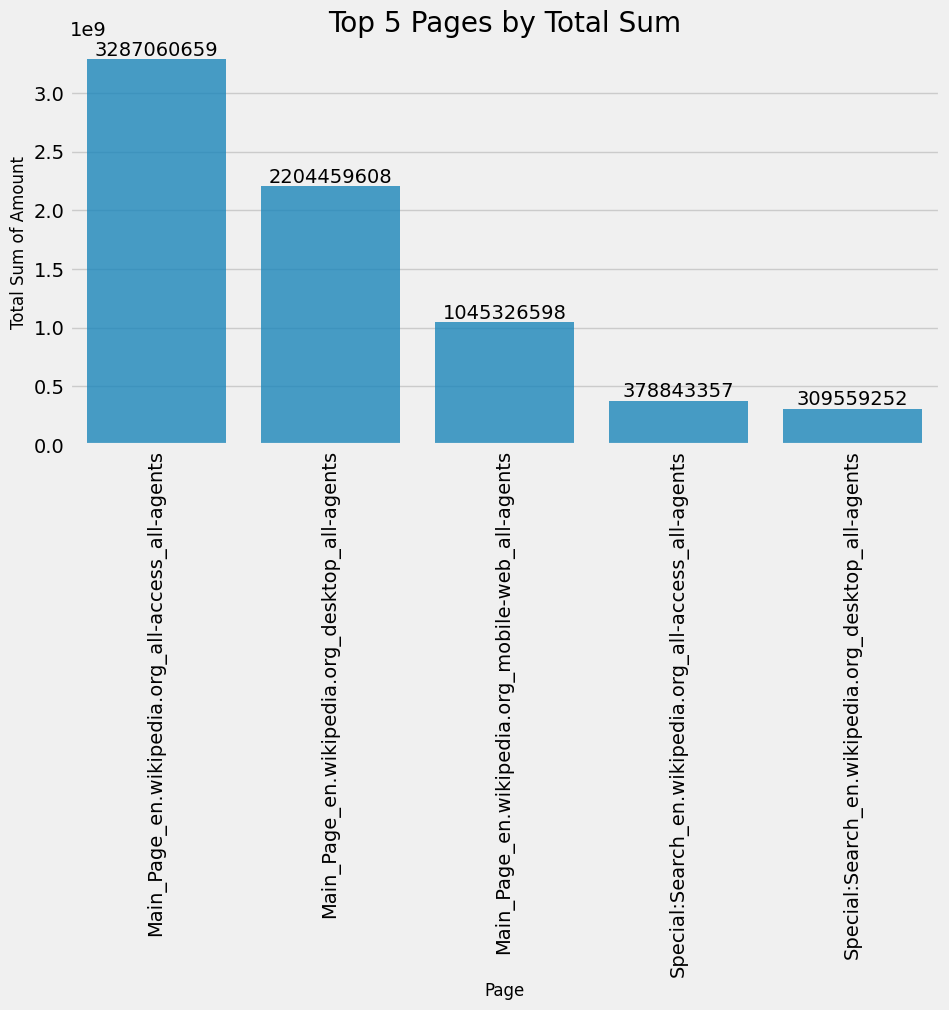

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

pattern = r'_en\.wikipedia\.org'
en_pages_train = train[train['Page'].str.contains(pattern, regex=True)].copy()

first_half_2016_columns = ['Page'] + [col for col in en_pages_train.columns if  '2016-01-01' <= col < '2016-07-01']
first_half_2016_train = en_pages_train[first_half_2016_columns].copy()

first_half_2016_train['total_views'] = first_half_2016_train.iloc[:, 1:].sum(axis=1)
top_5_pages = first_half_2016_train.nlargest(5, 'total_views')

# Візуалізувати дані
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_5_pages['Page'], y=top_5_pages['total_views'], alpha=0.8)
plt.title("Top 5 Pages by Total Sum")
plt.ylabel("Total Sum of Amount", fontsize=12)
plt.xlabel("Page", fontsize=12)
plt.xticks(rotation=90)

rects = ax.patches
labels = top_5_pages['total_views']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, int(label), ha="center", va="bottom")
plt.show()

# 7. Порівняти розподіли німецьких і французьких сторінок вікіпедії за червень 2016 року.

<ipython-input-30-a3572a4383a9>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_by_country_train = train[train['Page'].str.contains(pattern, regex=True)].copy()
<ipython-input-30-a3572a4383a9>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(german_data, label='German', shade=True)
<ipython-input-30-a3572a4383a9>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(french_data, label='French', shade=True)


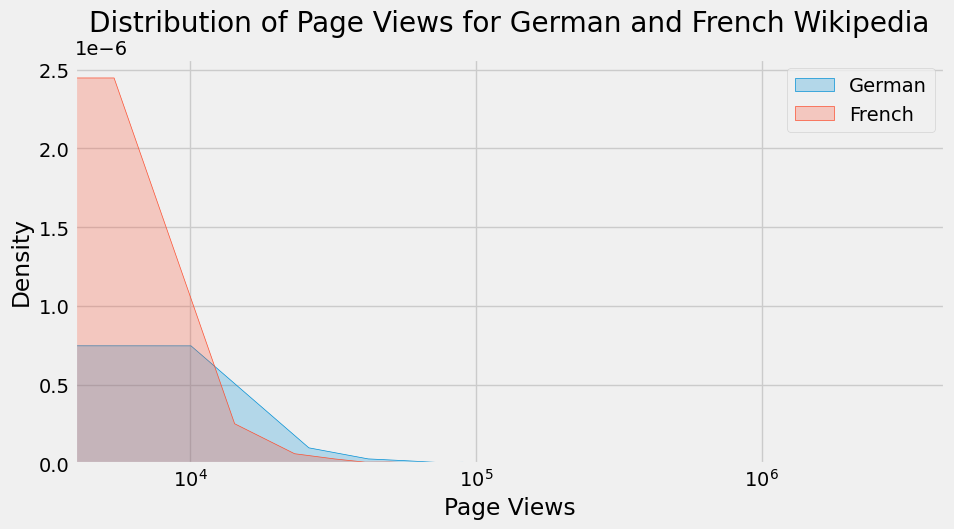

In [30]:
pattern = r'_(de|fr)\.wikipedia\.org'
filtered_by_country_train = train[train['Page'].str.contains(pattern, regex=True)].copy()

june_2016_columns = ['Page'] + [col for col in filtered_by_country_train.columns if '2016-06' in col]
filtered_train = filtered_by_country_train[june_2016_columns].copy()

melted_train = filtered_train.melt(id_vars='Page', var_name='Date', value_name='Views')

# melted_train.dropna(subset=['Views'], inplace=True)

melted_train['Language'] = melted_train['Page'].str.extract(pattern)

german_data = melted_train[melted_train['Language'] == 'de']['Views']
french_data = melted_train[melted_train['Language'] == 'fr']['Views']


plt.figure(figsize=(10, 5))

sns.kdeplot(german_data, label='German', shade=True)
sns.kdeplot(french_data, label='French', shade=True)

plt.title('Distribution of Page Views for German and French Wikipedia')

plt.legend()
plt.xlabel('Page Views')
plt.ylabel('Density')
plt.xscale('log')
plt.show()

# 8. Порівняти кількість переглядів для сторінок японської вікіпедії з розбивкою по днях тижня.

<ipython-input-32-e1d8927f0068>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_by_day.index, y=grouped_by_day.values, palette='viridis')


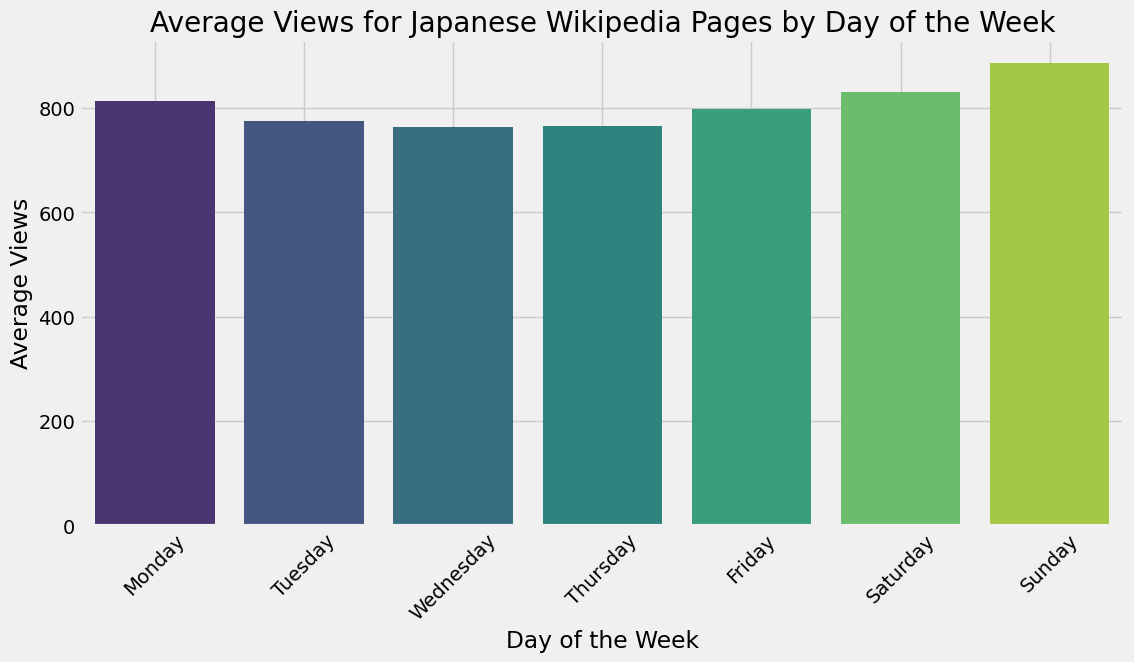

In [32]:
pattern = r'_ja\.wikipedia\.org'
filtered_by_country_train = train[train['Page'].str.contains(pattern, regex=True)].copy()

melted_train = filtered_by_country_train.melt(id_vars='Page', var_name='Date', value_name='Views')

# melted_train.dropna(subset=['Views'], inplace=True)

melted_train['Date'] = pd.to_datetime(melted_train['Date'].str.replace('_', '-'))

melted_train['DayOfWeek'] = melted_train['Date'].dt.day_name()

grouped_by_day = melted_train.groupby('DayOfWeek')['Views'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)



plt.figure(figsize=(12, 6))
sns.barplot(x=grouped_by_day.index, y=grouped_by_day.values, palette='viridis')
plt.title('Average Views for Japanese Wikipedia Pages by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()